### 

###
$$
    \bf{\Large\text{Постановка задачи}\normalsize}
$$

На подвижной поверхности находится n-ное количество метрономов. Необходимо определить частоту синхронизации, фазу синхронизации, также построить графики зависимостей $ \omega(t), \phi(t) $

В данной системе за основы мы возьмем модель Курамото, которая описывает синхронизацию систем:

$$
\frac{d\phi_i}{dt} = \omega_i + \sum_{j = 0}^{n} K_{ij}\sin{(\phi_j-\phi_i)}
$$

In [289]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from tqdm import tqdm
import solver2 as solver
from PIL import Image
from PIL import ImageDraw

In [290]:
ImageResolution = (512,512)
ImageColorSpace = "RGB"

r = 1
Colors = [
'green',
'red',
'blue',
'black',
'yellow',
'orange',
'purple'
]

resolution = 10**(-2)
duration = 4
omegas = [7.0, 6.5, 5.5, 5.0,2.5, 3.2, 7.9]
phis = [np.pi,np.pi*0.75, 10,12,3,5,9]
k_arr = [[-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0],
         [-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0]]

In [291]:
TimeAxis, Phi_Axis, Omega_Axis = solver.Integrator(resolution, duration, omegas, phis, k_arr)

In [292]:
n = len(Phi_Axis[0])

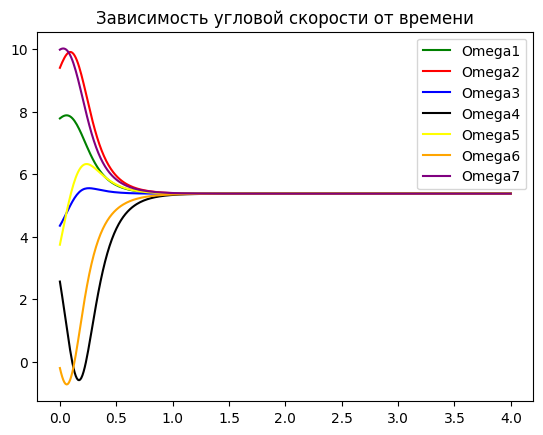

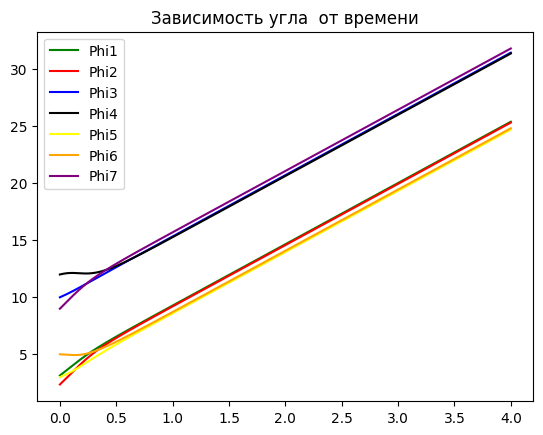

In [293]:

for i,OM in enumerate(Omega_Axis):
    plt.plot(TimeAxis,OM, color = Colors[i], label = str("Omega" + str(i+1)))
plt.title("Зависимость угловой скорости от времени")
plt.legend()
plt.savefig('Omegas.pdf')
plt.show()
#Phi_Axis = np.sin(Phi_Axis)
#TimeAxis = np.sin(TimeAxis)
for i,OM in enumerate(Phi_Axis):
    plt.plot(TimeAxis,OM, color = Colors[i], label = str("Phi" + str(i+1)))
plt.title("Зависимость угла  от времени")
plt.legend()
plt.savefig('Phis.pdf')
plt.show()

In [294]:

My_Image = Image.new(ImageColorSpace, ImageResolution)

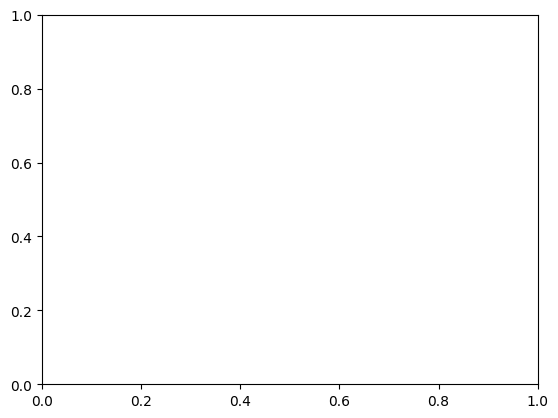

In [295]:
figure, axes = plt.subplots()

def frame (i):
    axes.clear()

    axes.set_xlim(-r * 10.1, r*10.1)
    axes.set_ylim(-r * 2.0, r*2.0)
    axes.set_aspect(1)
    axes.plot((-10.1,10.1),(0.5,0.5), color = 'black') 

    for j, phi in enumerate(Phi_Axis):
        x = np.sin(phi[i]) + j*2 -5
        y = 0.5*np.ones_like(x)
        axes.plot(x, y, marker = 'o', color = Colors[j], markersize = 15, zorder = 10)


In [296]:
frames_numbers = np.arange(n)
anime = FuncAnimation(figure, frame, frames = tqdm(frames_numbers[::2]), interval  = 10 )
anime.save('Metronomes.gif') 
display(anime)

MovieWriter ffmpeg unavailable; using Pillow instead.
100%|█████████▉| 199/200 [01:57<00:00,  1.69it/s]
